In [ ]:
#This is lab Report for the 5th lab session. The comparsion of KNN, SDG and Random Forest taking palce at Colab.

In [ ]:
##Step 1_ Import necessary Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
##Step 2: Load and Prepare Dataset-MNIST

In [4]:
# Step 1: Loading and preparing the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

# Split the dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

# Step 2: Use Stratified Sampling to create a smaller training set
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=42)

for train_idx, small_train_idx in stratified_split.split(X_train_scaled, y_train):
    X_train_small = X_train_scaled[small_train_idx]
    y_train_small = y_train[small_train_idx]

C:\Anaconda\envs\homl3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
##Step 3: Train SVM with Different Kernels

In [ ]:
##3.1: SVM with Linear Kernel

In [5]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
param_distribs_linear = {'C': [0.01, 0.1, 1, 10]}
rnd_search_linear = RandomizedSearchCV(svm_linear, param_distributions=param_distribs_linear, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search_linear.fit(X_train_small, y_train_small)
print("Best Linear Kernel Params:", rnd_search_linear.best_params_)
print("Best Cross-validation Accuracy (Linear Kernel):", rnd_search_linear.best_score_)


C:\Anaconda\envs\homl3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Linear Kernel Params: {'C': 0.01}
Best Cross-validation Accuracy (Linear Kernel): 0.9319999999999998


In [6]:
# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly')
param_distribs_poly = {'degree': [2, 3, 4], 'C': [0.01, 0.1, 1], 'coef0': [0, 0.1, 1]}
rnd_search_poly = RandomizedSearchCV(svm_poly, param_distributions=param_distribs_poly, n_iter=5, cv=5, scoring='accuracy', random_state=42)
rnd_search_poly.fit(X_train_small, y_train_small)
print("Best Polynomial Kernel Params:", rnd_search_poly.best_params_)
print("Best Cross-validation Accuracy (Poly Kernel):", rnd_search_poly.best_score_)

Best Polynomial Kernel Params: {'degree': 2, 'coef0': 0.1, 'C': 1}
Best Cross-validation Accuracy (Poly Kernel): 0.96235


In [7]:
# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
param_distribs_rbf = {'C': [0.01, 0.1, 1], 'gamma': [0.001, 0.01, 0.1]}
rnd_search_rbf = RandomizedSearchCV(svm_rbf, param_distributions=param_distribs_rbf, n_iter=5, cv=5, scoring='accuracy', random_state=42)
rnd_search_rbf.fit(X_train_small, y_train_small)
print("Best RBF Kernel Params:", rnd_search_rbf.best_params_)
print("Best Cross-validation Accuracy (RBF Kernel):", rnd_search_rbf.best_score_)

Best RBF Kernel Params: {'gamma': 0.01, 'C': 1}
Best Cross-validation Accuracy (RBF Kernel): 0.78755


In [ ]:
# Step 3: Evaluating the SVM models on the full test set

In [8]:
# Step 3: Evaluating the SVM models on the full test set
svm_best_poly = rnd_search_poly.best_estimator_
svm_best_rbf = rnd_search_rbf.best_estimator_
svm_best_linear = rnd_search_linear.best_estimator_

y_pred_poly = svm_best_poly.predict(X_test_scaled)
y_pred_rbf = svm_best_rbf.predict(X_test_scaled)
y_pred_linear = svm_best_linear.predict(X_test_scaled)

def print_metrics(y_true, y_pred, model_name):
    print(f"\nMetrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))

print_metrics(y_test, y_pred_poly, "Polynomial SVM")
print_metrics(y_test, y_pred_rbf, "RBF SVM")
print_metrics(y_test, y_pred_linear, "Linear SVM")


Metrics for Polynomial SVM:
Accuracy: 0.9643571428571428
Precision: 0.9642625483105375
Recall: 0.9641776335001158
F1 Score: 0.9642005678599921

Metrics for RBF SVM:
Accuracy: 0.7975
Precision: 0.9095640656410193
Recall: 0.794886686676984
F1 Score: 0.8249618768282273

Metrics for Linear SVM:
Accuracy: 0.933
Precision: 0.9326670149847098
Recall: 0.9320346318218352
F1 Score: 0.932156768450046


In [ ]:
##3.2: SVM with Polynomial Kernel

In [ ]:
##3.3: SVM with RBF Kernel

In [ ]:
##Step 4: Evaluation Metrics

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import pandas as pd

# Function to train model, track time, and print metrics
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    
    print(f"\nMetrics for {model_name}:")
    print(f"Training Time: {training_time:.2f} seconds")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    
    return training_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')


# Step 1: K-Nearest Neighbors (KNN) with Hyperparameter Tuning
knn_clf = KNeighborsClassifier()
param_distribs_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
rnd_search_knn = RandomizedSearchCV(knn_clf, param_distributions=param_distribs_knn, n_iter=5, cv=5, scoring='accuracy', random_state=42)
knn_time, knn_accuracy, knn_precision, knn_recall, knn_f1 = train_and_evaluate(rnd_search_knn, X_train_small, y_train_small, X_test_scaled, y_test, "K-Nearest Neighbors (Tuned)")

# Step 2: Stochastic Gradient Descent (SGD) with Hyperparameter Tuning
sgd_clf = SGDClassifier(random_state=42)
param_distribs_sgd = {'alpha': [0.0001, 0.001, 0.01], 'loss': ['hinge', 'log'], 'penalty': ['l2']}
rnd_search_sgd = RandomizedSearchCV(sgd_clf, param_distributions=param_distribs_sgd, n_iter=5, cv=5, scoring='accuracy', random_state=42)
sgd_time, sgd_accuracy, sgd_precision, sgd_recall, sgd_f1 = train_and_evaluate(rnd_search_sgd, X_train_small, y_train_small, X_test_scaled, y_test, "Stochastic Gradient Descent (Tuned)")

# Step 3: Random Forest with Hyperparameter Tuning
rf_clf = RandomForestClassifier(random_state=42)
param_distribs_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
rnd_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_distribs_rf, n_iter=5, cv=5, scoring='accuracy', random_state=42)
rf_time, rf_accuracy, rf_precision, rf_recall, rf_f1 = train_and_evaluate(rnd_search_rf, X_train_small, y_train_small, X_test_scaled, y_test, "Random Forest (Tuned)")





In [ ]:
# Step 5: Comparing computational complexity
def train_and_time(model, X_train, y_train):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    return end_time - start_time

svm_poly_time = train_and_time(svm_best_poly, X_train_small, y_train_small)
svm_rbf_time = train_and_time(svm_best_rbf, X_train_small, y_train_small)
svm_linear_time = train_and_time(svm_best_linear, X_train_small, y_train_small)
knn_time = train_and_time(knn_clf, X_train_small, y_train_small)
sgd_time = train_and_time(sgd_clf, X_train_small, y_train_small)
rf_time = train_and_time(rf_clf, X_train_small, y_train_small)

print("\nTraining times (in seconds):")
print("Polynomial SVM:", svm_poly_time)
print("RBF SVM:", svm_rbf_time)
print("Linear SVM:", svm_linear_time)
print("KNN:", knn_time)
print("SGD:", sgd_time)
print("Random Forest:", rf_time)

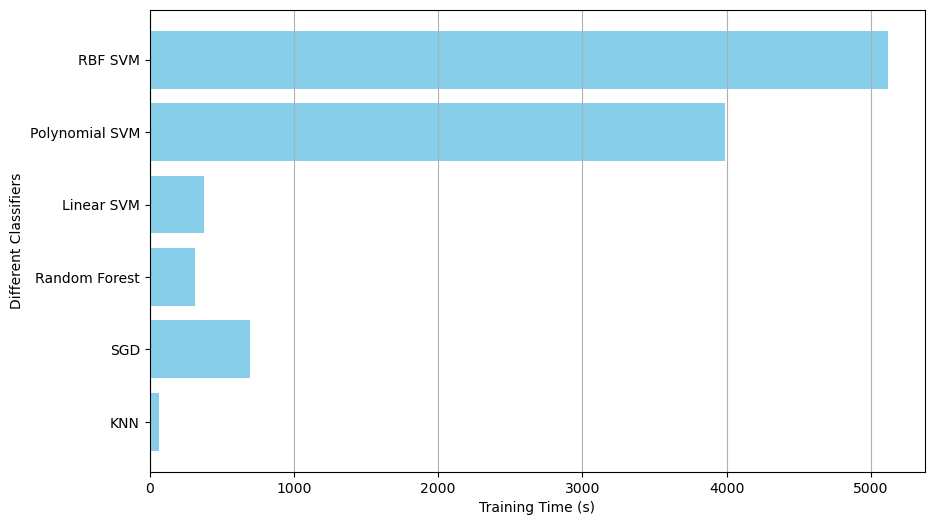

In [14]:
import matplotlib.pyplot as plt

# Data
classifiers = ['KNN', 'SGD', 'Random Forest', 'Linear SVM', 'Polynomial SVM', 'RBF SVM']
training_times = [67.88, 694.20, 314.44, 376.18, 3989.50, 5117.16]

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(classifiers, training_times, color='skyblue')
plt.xlabel('Training Time (s)')
plt.ylabel('Different Classifiers')
plt.grid(axis='x')

# Show the plot
plt.show()
